In [4]:
from transformers import GPT2LMHeadModel

f:\projects\gpt-2\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model_hf=GPT2LMHeadModel.from_pretrained('gpt2')

In [6]:
sd_hf=model_hf.state_dict()
c=0
for k,v in sd_hf.items():
    c+=1
    print(k,v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [8]:
# print(c)

In [9]:
import matplotlib.pyplot as plt

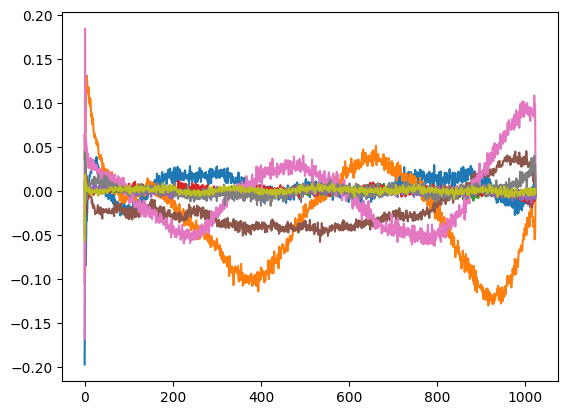

In [29]:
plt.plot(sd_hf["transformer.wpe.weight"][:,1:10])

In [22]:
sd_hf["transformer.wpe.weight"][:,:2].shape

torch.Size([1024, 2])

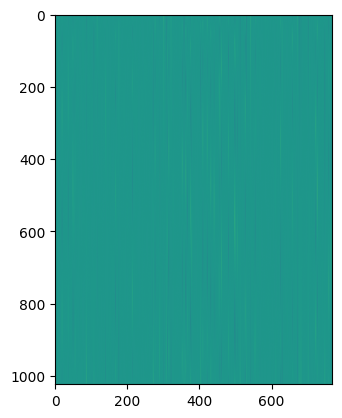

In [ ]:
plt.imshow(sd_hf["transformer.wpe.weight"])

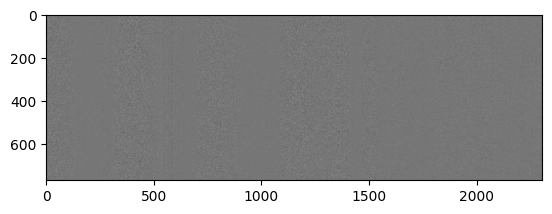

In [48]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"],cmap="grey")

In [53]:
sd_hf["transformer.h.1.attn.c_attn.weight"][:,1].shape

torch.Size([768])

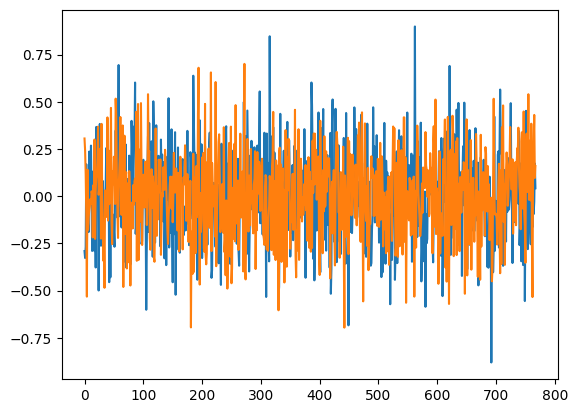

In [54]:
plt.plot(sd_hf["transformer.h.1.attn.c_attn.weight"][:,:2])

In [58]:
from transformers import pipeline,set_seed
generator=pipeline('text-generation',model='gpt2')
set_seed(42)
generator("Hello I'm a language model,",max_length=30,num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello I\'m a language model, and not a model as much as I\'d like to be. It\'s not like I\'m going to go and do an algorithm like some other programming language or some other code. It\'s like a model for you."\n\nTekkow: "I would love to be able to do a better understanding of how AI, and especially AI that\'s not human but is smarter than us, learns. But'},
 {'generated_text': "Hello I'm a language model, and not a model as much as I'd like to be. I wanted to explain why it gets different because I'm always a little bit of a guy, as you know.\n\nI understand where he's coming from, but I'm not sure if he's a linguist, or a language model. I haven't studied any of his texts as far as those two languages. It seems like he's"},
 {'generated_text': "Hello I'm a language model, and not a model as much as I'd like to be.\n\nWhen I say we're going to create a system where I'm able to use a language with my own language, I don't mean that I can just speak English. I thin

In [63]:
print("The number of parameters : %.2fM"% (1e5/1e6))

The number of parameters : 0.10M


In [64]:
import torch

In [67]:
torch.arange(0,10,dtype=torch.long).unsqueeze(0)

torch.Size([1, 10])

In [6]:
import tiktoken
import torch

In [2]:
enc=tiktoken.get_encoding('gpt2')

In [4]:
a=enc.encode("hi I am a language model")

In [8]:
a=torch.tensor(a,dtype=torch.long)

In [31]:
a=a.unsqueeze(0).repeat(5,1)

In [32]:
a.shape

torch.Size([5, 6])

In [34]:
logits=torch.randn(5,7,24)

In [35]:
logits=logits[:,-1,:]

In [52]:
logits.shape

torch.Size([5, 24])

In [38]:
topk_probs,topk_ind=torch.topk(logits,3,dim=-1)

In [49]:
ix=torch.multinomial(topk_probs,1)

In [56]:
x=torch.gather(topk_ind,-1,ix)

In [69]:
a=torch.cat((a,x),dim=1)

In [70]:
a

tensor([[5303,  314,  716,  257, 3303, 2746,   20,   20,   20,   20,   20,   20],
        [5303,  314,  716,  257, 3303, 2746,    1,    1,    1,    1,    1,    1],
        [5303,  314,  716,  257, 3303, 2746,   15,   15,   15,   15,   15,   15],
        [5303,  314,  716,  257, 3303, 2746,   17,   17,   17,   17,   17,   17],
        [5303,  314,  716,  257, 3303, 2746,    2,    2,    2,    2,    2,    2]])

In [4]:
# # # We always start with a dataset to train on. Let's download the tiny shakespeare dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

In [6]:
with open ('input.txt','r') as f:
    text=f.read()
data=text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [20]:
import tiktoken
import torch

In [8]:
enc=tiktoken.get_encoding('gpt2')

In [14]:
tokens=enc.encode(data)

In [18]:
tokens[:10]

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11]

In [25]:
buf=torch.tensor(tokens[:24+1])
x=buf[:-1].view(4,6)
y=buf[1:].view(4,6)

In [1]:
import torch

In [5]:
a=torch.nn.Linear(10,10)

In [6]:
a.weight

Parameter containing:
tensor([[ 0.0353, -0.2434, -0.1049,  0.0325,  0.0037,  0.1224, -0.0012, -0.2265,
          0.2306,  0.0923],
        [-0.1675,  0.2114,  0.2851,  0.1790, -0.2229, -0.1490, -0.0445,  0.0089,
         -0.0243,  0.1533],
        [-0.2986,  0.3060, -0.1027,  0.0619, -0.2284, -0.1002,  0.2929,  0.0422,
          0.0379, -0.2527],
        [ 0.0850, -0.2533, -0.1462,  0.2875, -0.1091, -0.0427, -0.2155, -0.1608,
          0.0809, -0.1213],
        [ 0.1047,  0.3150, -0.2243, -0.2117, -0.1901, -0.1159, -0.2450, -0.2407,
         -0.2244, -0.0627],
        [ 0.2441, -0.2792,  0.2459, -0.1697,  0.1658, -0.2776, -0.1830,  0.1859,
         -0.0930,  0.2215],
        [-0.2330, -0.1301, -0.2573, -0.0141,  0.0715,  0.2095, -0.0156,  0.0428,
         -0.2785, -0.3056],
        [ 0.1120,  0.0749, -0.0869, -0.2953, -0.2506, -0.1335, -0.2556,  0.2430,
         -0.2018,  0.2151],
        [-0.2615,  0.0495,  0.0178,  0.1761, -0.1912,  0.2548, -0.1970,  0.1328,
          0.2376, -0.2287

In [11]:
torch.nn.init.zeros_(a.weight)

Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True)